In [6]:
# numpy 科学计算库，主要用来做矩阵运算
import numpy as np 
# pandas 数据分析处理库
import pandas as pd
# matplotlib 可视化库
import matplotlib.pyplot as plt
# seaborn 可视化库，封装Matplot基础之上
import seaborn as sns
plt.style.use('fivethirtyeight') 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

数据读起来，先看看啥东西

In [8]:
# 读取csv文件
data=pd.read_csv('train.csv')
# 获取前几条数据
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


瞅一瞅有木有缺失值

In [7]:
# checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

整体看看数据啥规模

In [9]:
data.describe()
# count 加起来的总数
# mean 
# std
# min
# 25%
# 50%
# 75%
# max

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


不是要预测这大船的获救情况嘛，先看看获救比例咋样

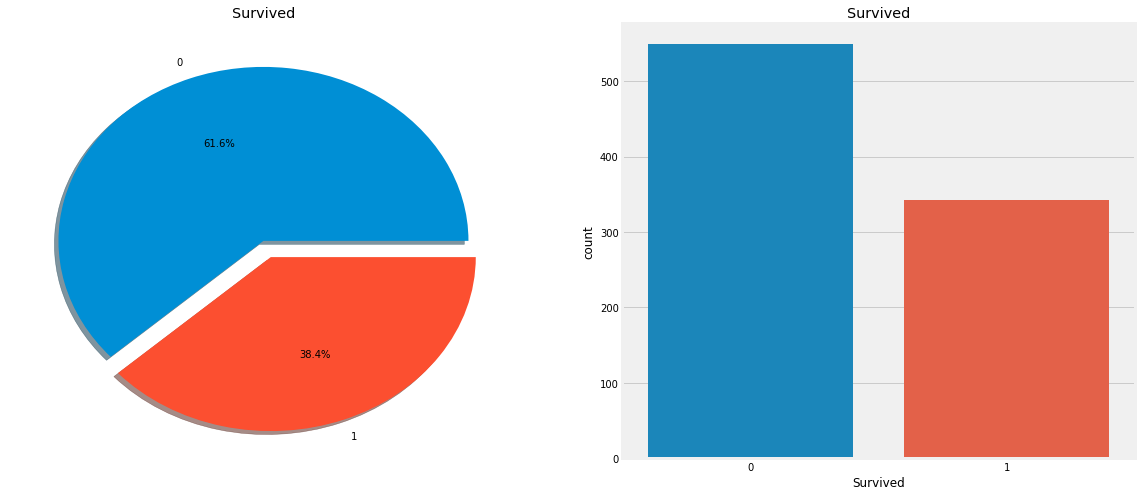

In [10]:
# subplots
f,ax=plt.subplots(1,2,figsize=(18,8))
# value_counts().plot.pie()
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# set_title
ax[0].set_title('Survived')
# set_ylabel
ax[0].set_ylabel('')
# countplot
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

显然，这次事故中没有多少乘客幸免于难。
在训练集的891名乘客中，只有大约350人幸存下来，只有38.4%的机组人员在空难中幸存下来。我们需要从数据中挖掘出更多的信息，看看哪些类别的乘客幸存下来，哪些没有。
我们将尝试使用数据集的不同特性来检查生存率。比如性别，年龄，登船地点等，但是首先我们得来理解下数据中的特征！

## 数据特征分为：连续值和离散值
- 离散值：性别（男，女）登船地点（S,Q,C）
- 连续值：年龄，船票价格

In [13]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

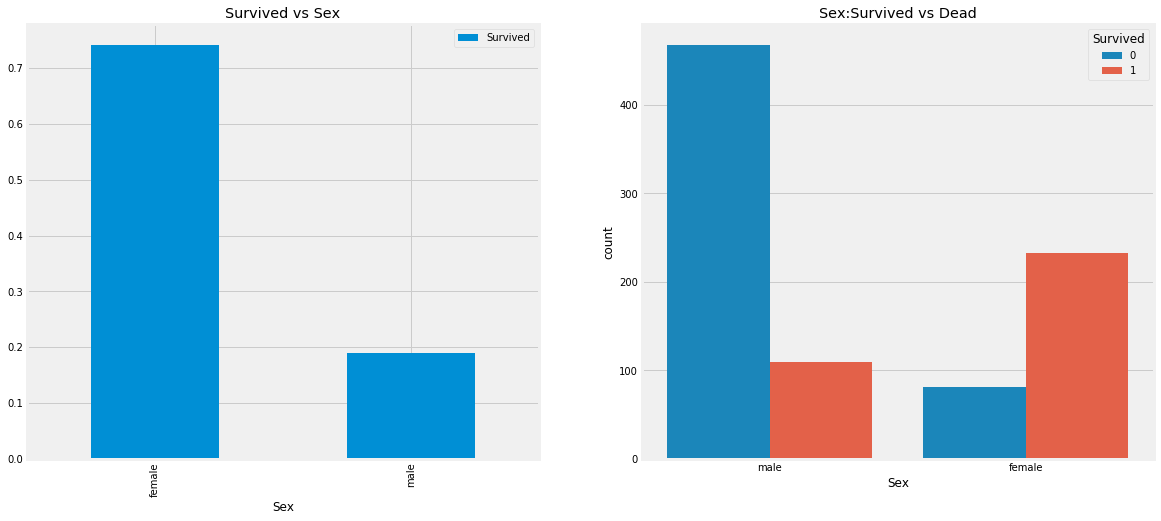

In [15]:
# subplots
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])

ax[1].set_title('Sex:Survived vs Dead')
plt.show()